In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [12]:
df_train_flight = pd.read_excel(r"C:\Users\SONALI\Downloads\Compressed\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])

In [13]:
df_test_flight = pd.read_excel(r"C:\Users\SONALI\Downloads\Compressed\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])

In [14]:
df_train_flight["dataset"]="train"
df_test_flight["dataset"]="test"

In [15]:
#Merging the datasets
df=pd.concat([df_train_flight,df_test_flight],ignore_index=True)

In [16]:
df_test_flight.shape

(2671, 11)

In [17]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table.sort_values('% of Total Missing Values', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df)

Your selected dataframe has 12 columns and 13354 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Airline,0,0,0.0,12,object
Date_of_Journey,0,0,0.0,40,datetime64[ns]
Source,0,0,0.0,5,object
Destination,0,0,0.0,6,object
Dep_Time,0,0,0.0,223,datetime64[ns]
Arrival_Time,0,0,0.0,1451,datetime64[ns]
Duration,0,0,0.0,374,object
Additional_Info,0,0,0.0,10,object
dataset,0,0,0.0,2,object
Route,0,1,0.0,132,object


In [18]:
df=df.dropna(subset=['Route', 'Total_Stops'])

In [19]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dataset               0
dtype: int64

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-30 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-30 05:50:00,2022-03-30 13:15:00,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-30 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-30 18:05:00,2022-03-30 23:30:00,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-30 16:50:00,2022-03-30 21:35:00,4h 45m,1 stop,No info,13302.0,train


New Column Duration

In [21]:
x=(df["Arrival_Time"]-df["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"]=duration_list

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-30 22:20:00,2022-03-22 01:10:00,2.833333,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-30 05:50:00,2022-03-30 13:15:00,7.416667,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-30 09:25:00,2022-06-10 04:25:00,19.000000,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-30 18:05:00,2022-03-30 23:30:00,5.416667,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-30 16:50:00,2022-03-30 21:35:00,4.750000,1 stop,No info,13302.0,train


In [23]:
#Since we have Date of journey,dep_time and duration we can drop "Arrival_Time"  right away
df.drop(columns=["Arrival_Time"],inplace=True)

OBJECT DATATYPES

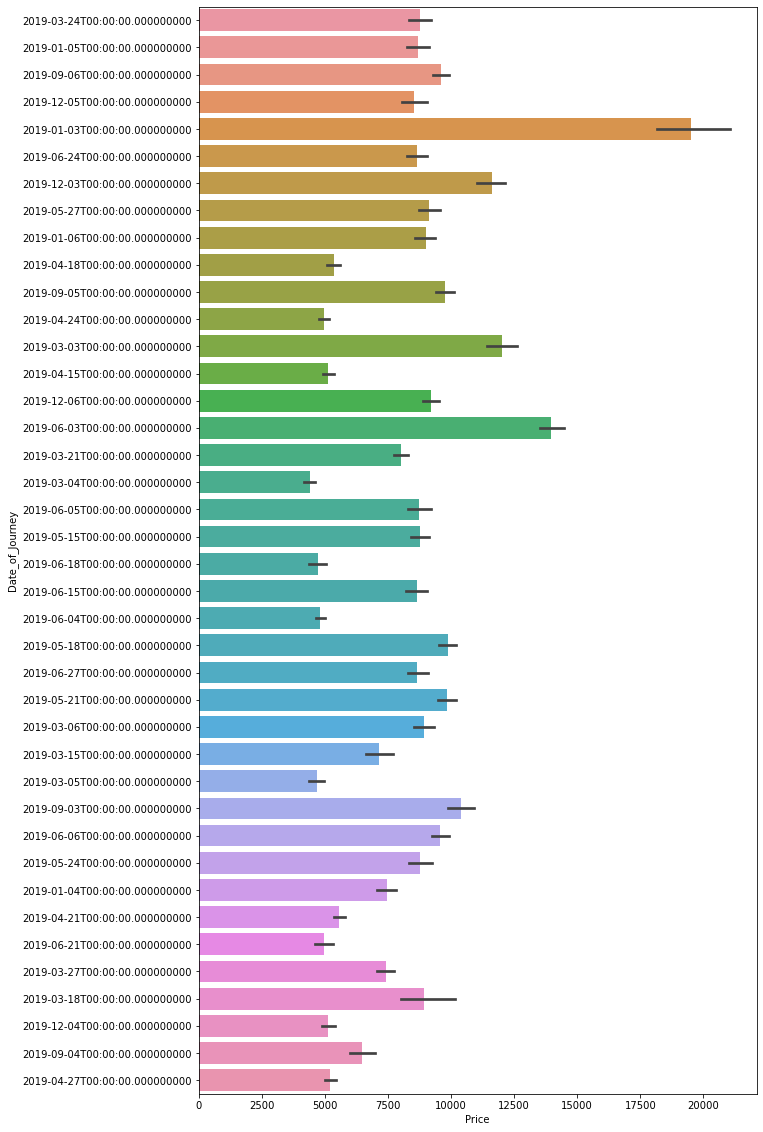

In [24]:
#Lets chcek when the averge price of the flights during entire day
plt.figure(figsize=(10,20))
sns.barplot(y="Date_of_Journey",x="Price",data=df)
plt.show()

In [25]:
#Lets chcek the value counts of each column of object datatype
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU

In [26]:
#In Destination column "New Delhi" can be replaced by "Delhi"
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [27]:
#need to exract features from dep_time
import numpy as np
df["time_of_day"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<=2),"Late Night",
                         np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<=7),"Early Morning",
                         np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<=11),"Morning",
                         np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<=16),"Afternoon",
                         np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening",
                         "Night")))))

In [28]:
#lets delete the Dep_Time column from the dataset
df.drop(columns=["Dep_Time"],inplace=True)

In [29]:
df.drop(columns=["Date_of_Journey"],inplace=True)

In [30]:
df.drop(columns=["Route"],inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,dataset,time_of_day
0,IndiGo,Banglore,Delhi,2.833333,non-stop,No info,3897.0,train,Night
1,Air India,Kolkata,Banglore,7.416667,2 stops,No info,7662.0,train,Early Morning
2,Jet Airways,Delhi,Cochin,19.000000,2 stops,No info,13882.0,train,Morning
3,IndiGo,Kolkata,Banglore,5.416667,1 stop,No info,6218.0,train,Evening
4,IndiGo,Banglore,Delhi,4.750000,1 stop,No info,13302.0,train,Afternoon


In [32]:
def missing_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df.nunique()
        mz_table['Data Type'] = df.dtypes
        
        mz_table = mz_table.sort_values('% of Total Missing Values', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df)

Your selected dataframe has 9 columns and 13353 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
Airline,0,0,0.0,12,object
Source,0,0,0.0,5,object
Destination,0,0,0.0,5,object
Duration,32,0,0.0,286,float64
Total_Stops,0,0,0.0,5,object
Additional_Info,0,0,0.0,10,object
dataset,0,0,0.0,2,object
time_of_day,0,0,0.0,6,object
Price,0,2671,20.0,1870,float64


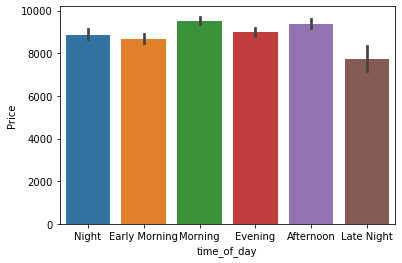

In [33]:
#Lets chcek when the averge price of the flights during entire day
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="time_of_day",y="Price",data=df)
plt.show()

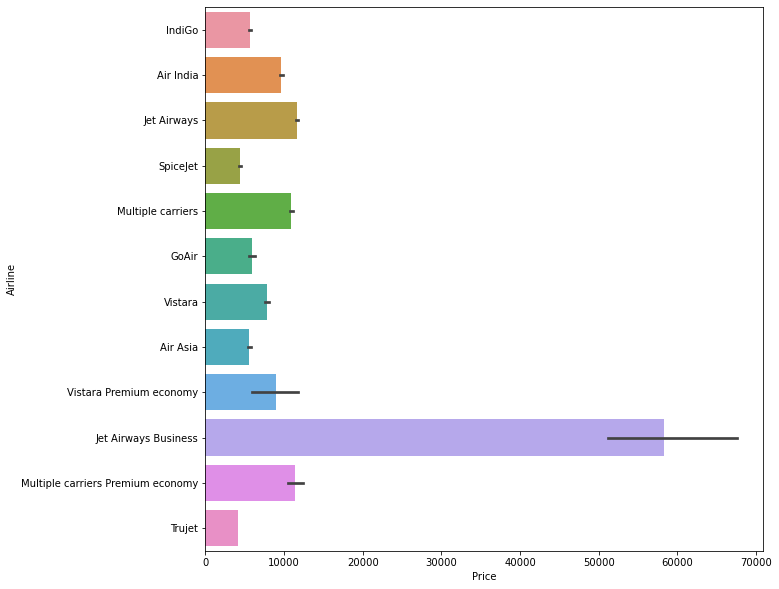

In [34]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(10,10))
sns.barplot(y="Airline",x="Price",data=df)
plt.show()

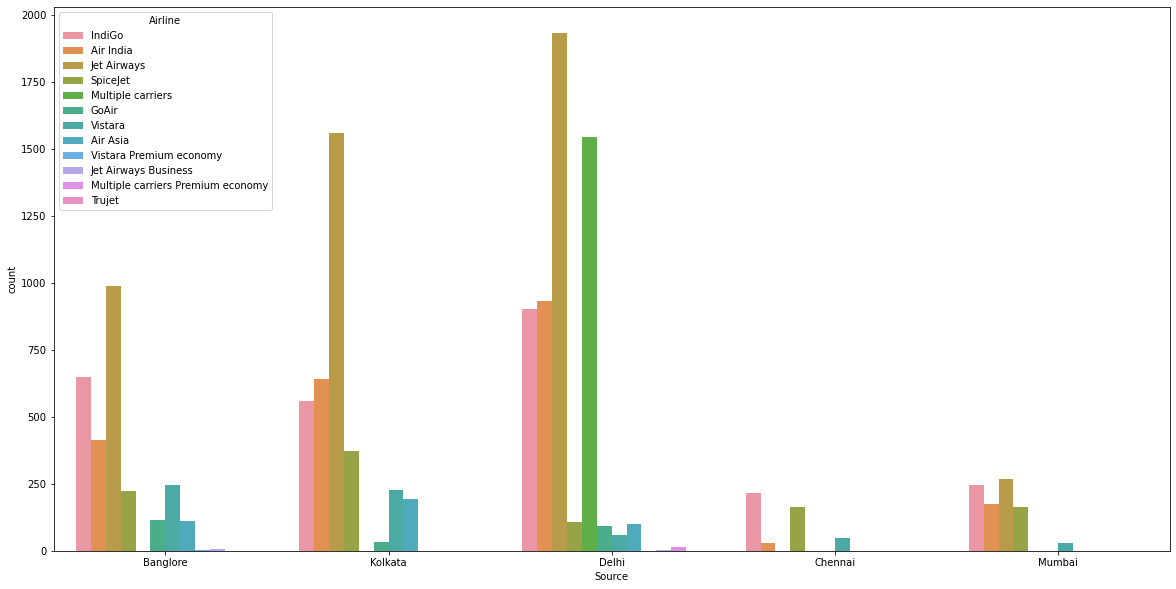

In [35]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,10))
sns.countplot(x="Source",hue="Airline",data=df)
plt.show()

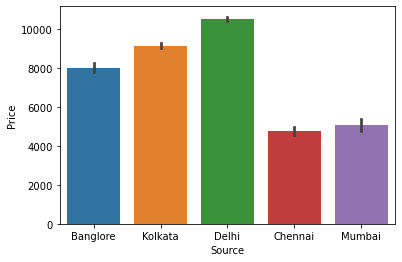

In [36]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="Source",y="Price",data=df)
plt.show()

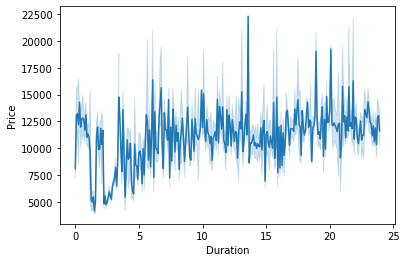

In [37]:
#lets draw a line plot between duration and price
sns.lineplot(x="Duration",y="Price",data=df)
plt.show()

The picture does not give clear idea about the correlation

In [38]:
#lets chcek the correlation matrix
df.corr()

,Duration,Price
Duration,1.00000,0.45041
Price,0.45041,1.00000


There is positive correlation of 0.45 between price and duration

In [39]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration           float64
Total_Stops         object
Additional_Info     object
Price              float64
dataset             object
time_of_day         object
dtype: object

In [40]:
#lets use one hot encodig to covert object datatypes to integers
df_final=pd.get_dummies(df,columns=["Airline","Source","Destination","Additional_Info","Total_Stops","time_of_day"],drop_first=True)

In [41]:
#Lets chcek display the data genrated after one hot encoding
df_final.head()

,Duration,Price,dataset,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.833333,3897.0,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,7.416667,7662.0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,19.000000,13882.0,train,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,5.416667,6218.0,train,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,4.750000,13302.0,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
df_final.shape

(13353, 40)

In [43]:
#Lets seprate the train and test from df_final
df_train=df_final.loc[df_final["dataset"]=="train"]
df_test=df_final.loc[df_final["dataset"]=="test"]

In [44]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [45]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [46]:
#lets divide the df_train into iput an doutput
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [47]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [48]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,df_x,y)

r2 score corresponding to  42  is  0.7040265834527341
r2 score corresponding to  43  is  0.7507145858206778
r2 score corresponding to  44  is  0.6862626919860106
r2 score corresponding to  45  is  0.6519030329736099
r2 score corresponding to  46  is  0.70133183611476
r2 score corresponding to  47  is  0.6565978570578552
r2 score corresponding to  48  is  0.6975935568719442
r2 score corresponding to  49  is  0.6732718007416999
r2 score corresponding to  50  is  0.651761885873773
r2 score corresponding to  51  is  0.6832899612577283
r2 score corresponding to  52  is  0.6771558276877501
r2 score corresponding to  53  is  0.657956240675091
r2 score corresponding to  54  is  0.6071188618096113
r2 score corresponding to  55  is  0.6773872644672325
r2 score corresponding to  56  is  0.6590228663889748
r2 score corresponding to  57  is  0.7360947967538669
r2 score corresponding to  58  is  0.7223993470863963
r2 score corresponding to  59  is  0.6782349930741705
r2 score corresponding to  60  i

In [50]:
#Lets chcek the cross_val_score for decision trees
print("Decision Tree Regressor\n\n")
model_evaluation(dtr,df_x,y)

Decision Tree Regressor


Mean r2 score for regressor:  0.6920252516594287
standard deviation in r2 score for regressor:  0.01569617136361945
[0.67649908 0.71830024 0.67525246 0.6943513  0.69572319]


In [52]:
#Lets chcek random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [53]:
rtr=RandomForestRegressor(n_estimators=100)
r_state=maxr2_score(dtr,df_x,y)

r2 score corresponding to  42  is  0.7036402017571686
r2 score corresponding to  43  is  0.7532738781158475
r2 score corresponding to  44  is  0.6868872352931734
r2 score corresponding to  45  is  0.6565613120066207
r2 score corresponding to  46  is  0.7017760715512542
r2 score corresponding to  47  is  0.656388225398186
r2 score corresponding to  48  is  0.6996669871556065
r2 score corresponding to  49  is  0.6728768699537888
r2 score corresponding to  50  is  0.652330565352168
r2 score corresponding to  51  is  0.6834860736878541
r2 score corresponding to  52  is  0.677529440696993
r2 score corresponding to  53  is  0.6572068340395489
r2 score corresponding to  54  is  0.6073987383188175
r2 score corresponding to  55  is  0.6770253066053962
r2 score corresponding to  56  is  0.6585604952483896
r2 score corresponding to  57  is  0.7330793301150846
r2 score corresponding to  58  is  0.7274070726076856
r2 score corresponding to  59  is  0.678515410366445
r2 score corresponding to  60  i

In [56]:
#lets chcek Random forest using n_estimators=100 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)

In [57]:
#Lets chcek the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,df_x,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7355378375259891
standard deviation in r2 score for regressor:  0.011403042114219325
[0.72605338 0.75335302 0.72066827 0.73921269 0.73840184]


random forest  peforming almost  good

In [58]:
#rfr is model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 75,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [59]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2043.5271169632372
r2_score is:  0.8166752921760843


In [60]:
price_pred=rfr.predict(df_test)

In [61]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [62]:
#Lets save the submission to csv
price_pred.to_csv("Flight_Price_Predictions.csv",index=False)